In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import signac

In [2]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 3
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 1

SAVE_FIGS = True
length_unit = "$\sigma$"

In [4]:
project = signac.get_project("../../testing-model/performance/")

In [10]:
job.doc.num_mols

7200

2000 9551.0
8000 5407.0
18000 3851.0
32000 2351.0
72000 947.0
128000 1046.0
200000 699.0
288000 516.0


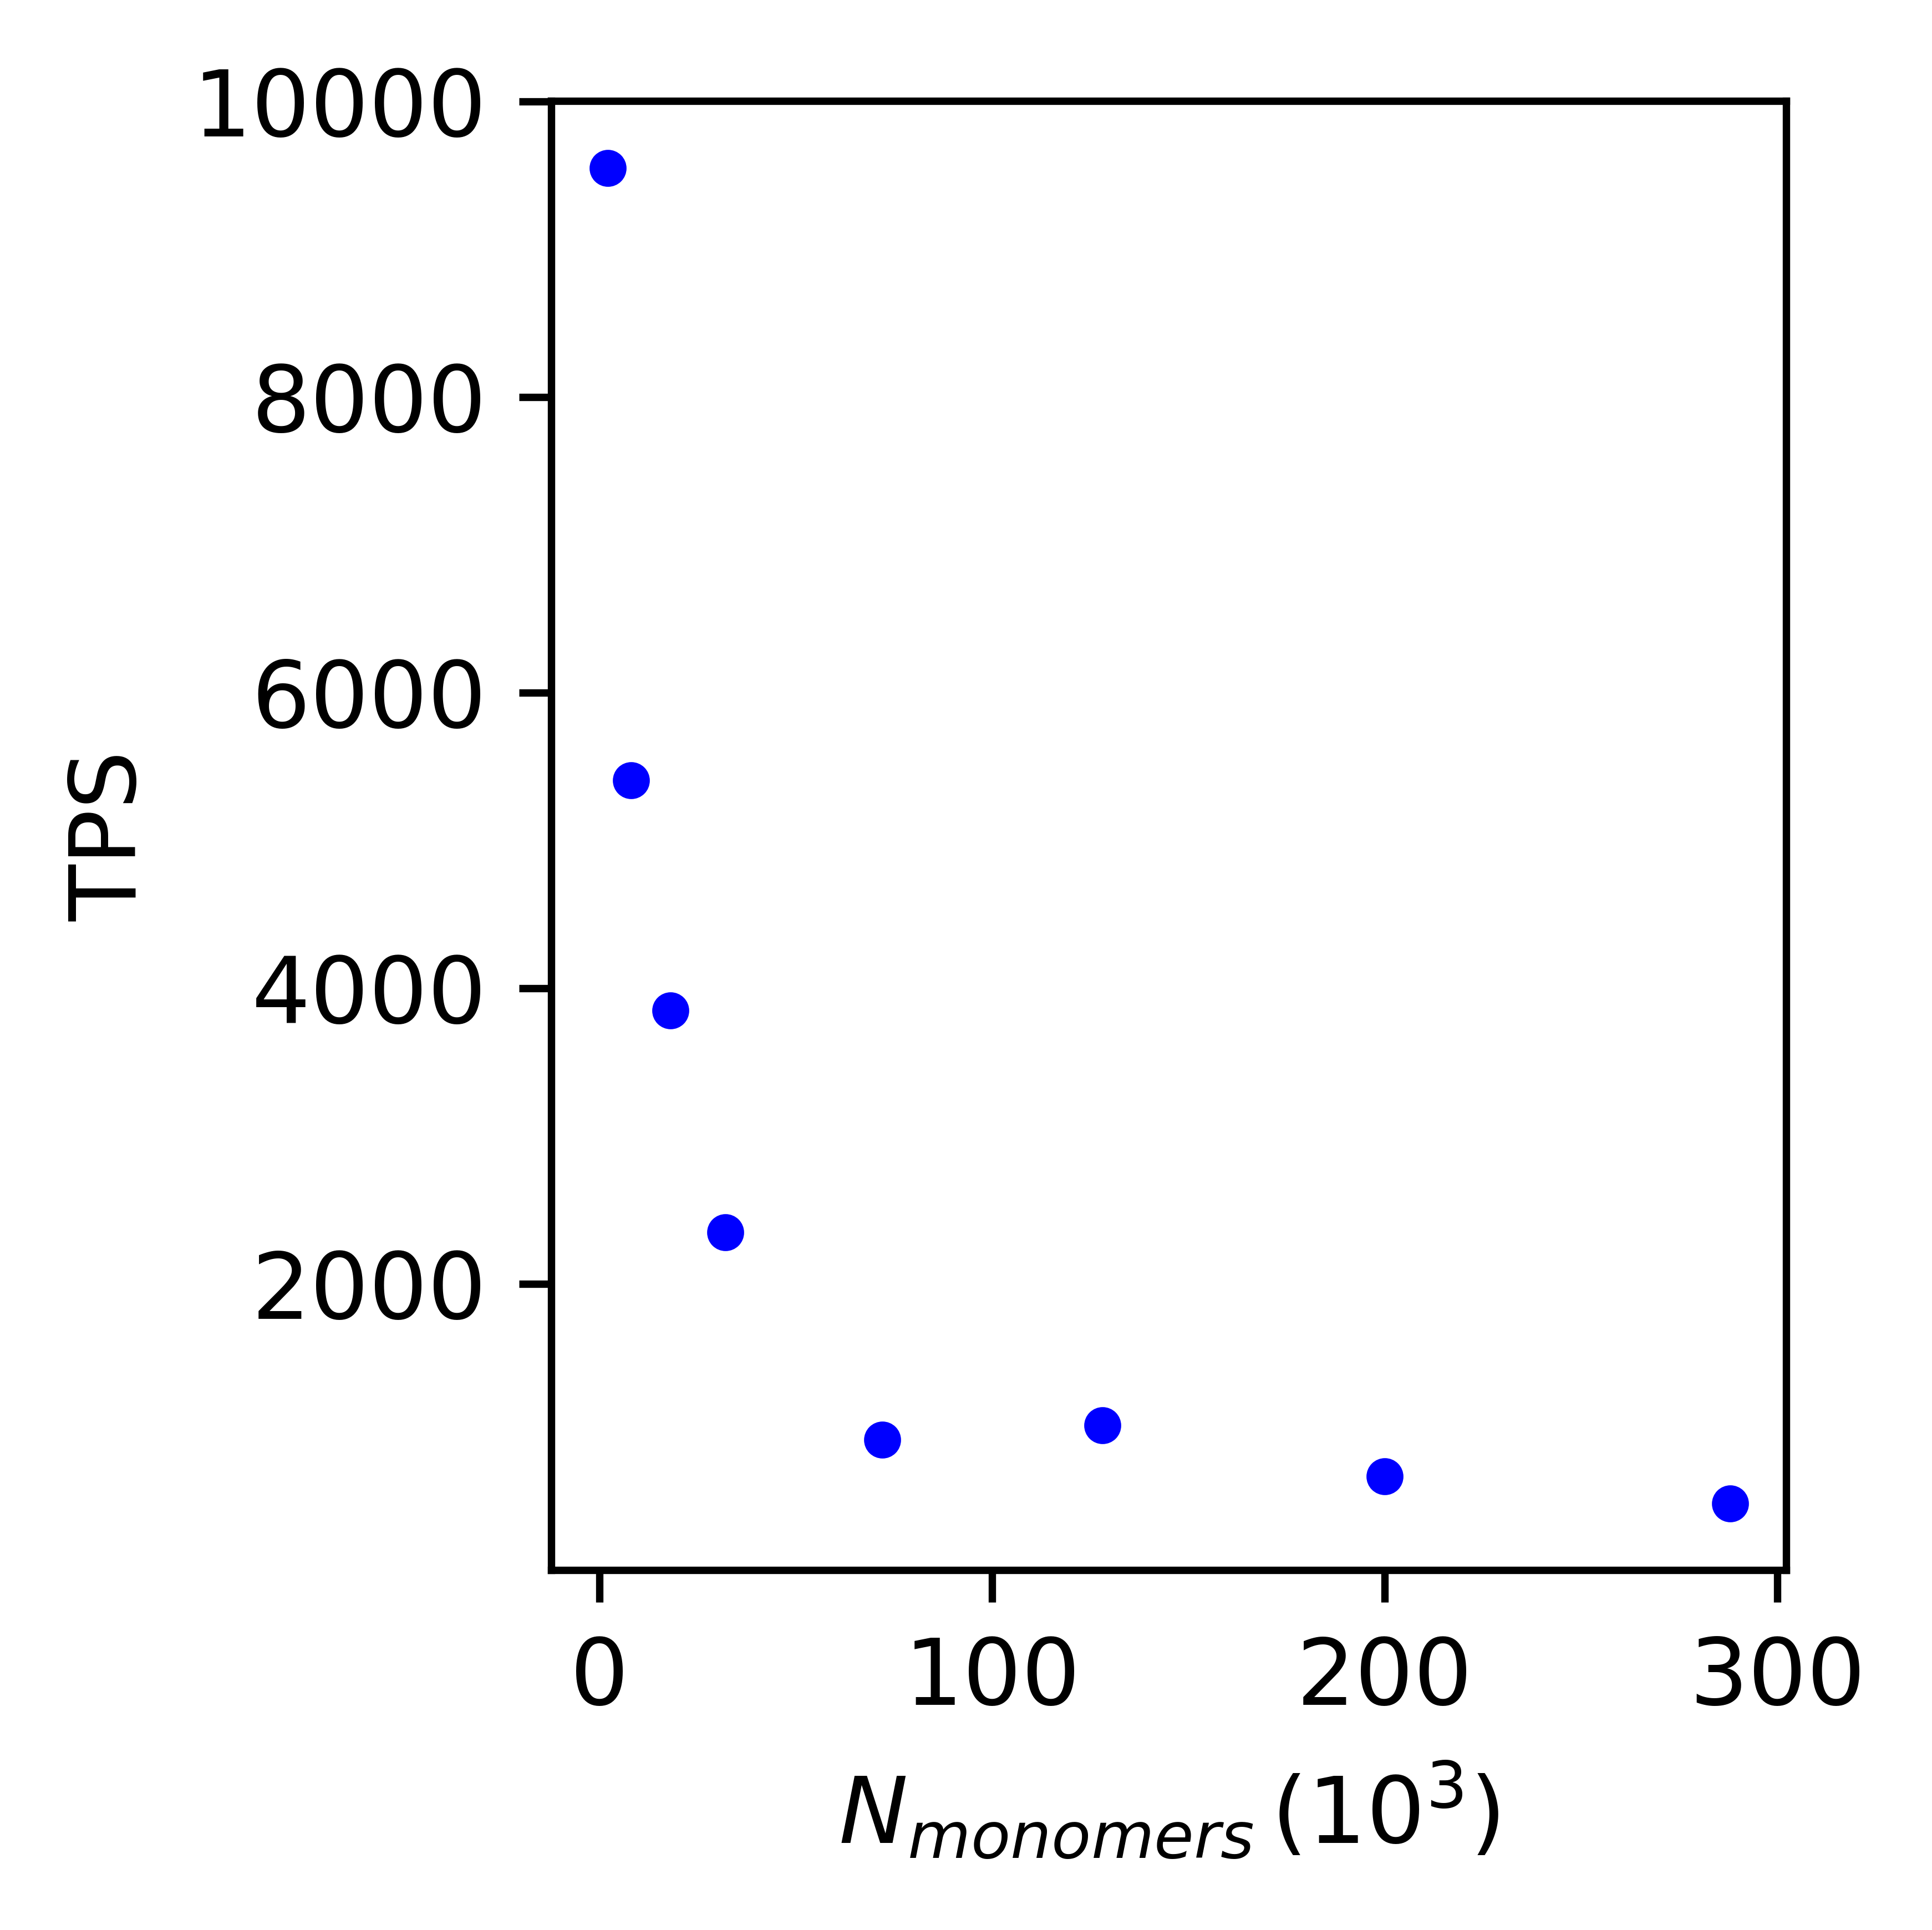

In [29]:
fig = plt.figure()

for N, jobs in project.find_jobs({"use_tree": False}).groupby("n_repeats"):
    for job in jobs:
        data = np.genfromtxt(job.fn("log0.txt"), names=True)
        tps = data["flowermdbasesimulationSimulationtps"]
        avg_tps = np.mean(tps[-500:])
        plt.plot(int(job.doc.num_mols * job.sp.lengths / 1000), avg_tps, "o", color="blue")
        print(job.doc.num_mols * job.sp.lengths, np.round(avg_tps, 0))

#for N, jobs in project.find_jobs({"use_tree": True}).groupby("n_repeats"):
#    for job in jobs:
#        if job.doc.runs != 1:
#            continue
#        data = np.genfromtxt(job.fn("log0.txt"), names=True)
#        tps = data["flowermdbasesimulationSimulationtps"]
#        avg_tps = np.mean(tps[-500:])
#        plt.plot(job.doc.num_mols * 40, avg_tps, "o", color="orange")


plt.ylabel("TPS")
plt.xlabel("$N_{monomers}\,(10^3)$")
plt.tight_layout()
if SAVE_FIGS:
    plt.savefig("../../FIGS/cg-model-tps.png")

$5 \times 10$